# Computational Simulation of Equivalence Class Formation Using the go/no-go Procedure with Compound Stimuli

### Abstract
Research about equivalence has commonly utilized human participants as experimental subjects. More recently, computational models have been capable of reproducing performances observed in experiments with humans. The computational model often utilized is called RELNET, and it simulates training and testing trials of conditional relations using the matching-to-sample procedure (MTS). The differentiation between sample stimulus and comparison stimuli, indispensable in MTS, implies operational difficulties for simulations. For this reason, new studies seek to utilize alternative procedures to MTS, which do not differentiate the functions of the antecedent stimuli. This work evaluated the possibility of developing a new computational model to simulate equivalence class formation using the go/no-go procedure with compound stimuli. In Experiment 1, artificial neural networks were utilized to simulate training of the AB and BC relations as well as the testing of the AC relation. The results showed that four out of six runs demonstrated equivalence class formation. Experiment 2 evaluated whether the additional class training performed in Experiment 1, which was analogous to the simulation of pre-experimental experience of human participants, would be essential for simulating the establishment of equivalence classes. It was found that it was not possible to simulate equivalence class formation without the additional class training. Altogether, the experiments show that it is possible to simulate equivalence class formation using the go/no-go procedure with compound stimuli and that it is necessary to conduct additional class training. The model developed is, therefore, an alternative to RELNET for the study of equivalence relations using computational simulations.

[article](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4960284/pdf/40732_2016_Article_184.pdf)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

%matplotlib inline
plt.style.use('seaborn')

In [2]:
dat=pd.read_csv("Results_1/TF_replicas.csv", 
                header=None, 
                names=(["exp_1_n_epocs",
                        "XY_1",
                        "YZ_1",
                        "XZ_1",
                        "A1B1_1",
                        "A1B2_1",
                        "B1C1_1",
                        "B1C2_1",
                        "A2B2_1",
                        "A2B1_1",
                        "B2C2_1",
                        "B2C1_1",
                        "A1C1_1",
                        "A1C2_1",
                        "A2C2_1",
                        "A2C1_1",
                        "exp_2_final_loss",
                        "exp_2_n_epocs",
                        "A1B1_2",
                        "A1B2_2",
                        "B1C1_2",
                        "B1C2_2",
                        "A2B2_2",
                        "A2B1_2",
                        "B2C2_2",
                        "B2C1_2",
                        "A1C1_2",
                        "A1C2_2",
                        "A2C2_2",
                        "A2C1_2",
                       ]))# , sep=";" # para bases en español #_hid_4_1
#dat=pd.read_csv("Results_1/test_hid_4_1.csv")# , sep=";" # para bases en español #_hid_4_1
print(len(dat))
print(list(dat.columns))

424
['exp_1_n_epocs', 'XY_1', 'YZ_1', 'XZ_1', 'A1B1_1', 'A1B2_1', 'B1C1_1', 'B1C2_1', 'A2B2_1', 'A2B1_1', 'B2C2_1', 'B2C1_1', 'A1C1_1', 'A1C2_1', 'A2C2_1', 'A2C1_1', 'exp_2_final_loss', 'exp_2_n_epocs', 'A1B1_2', 'A1B2_2', 'B1C1_2', 'B1C2_2', 'A2B2_2', 'A2B1_2', 'B2C2_2', 'B2C1_2', 'A1C1_2', 'A1C2_2', 'A2C2_2', 'A2C1_2']


count      424.000000
mean      5408.169811
std       1029.054090
min       3801.000000
25%       4758.750000
50%       5167.500000
75%       5631.250000
max      10448.000000
Name: exp_1_n_epocs, dtype: float64

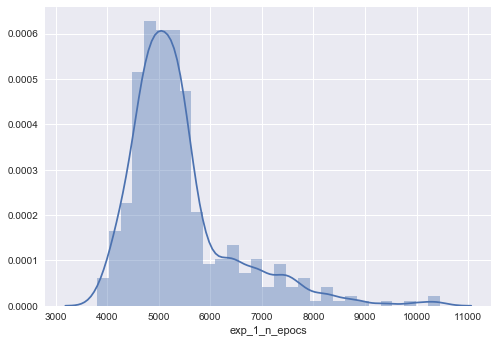

In [3]:
sns.distplot(dat["exp_1_n_epocs"])
#dat["exp_1_n_epocs"].plot.density(figsize=(12,8),alpha=0.6)
dat["exp_1_n_epocs"].describe()

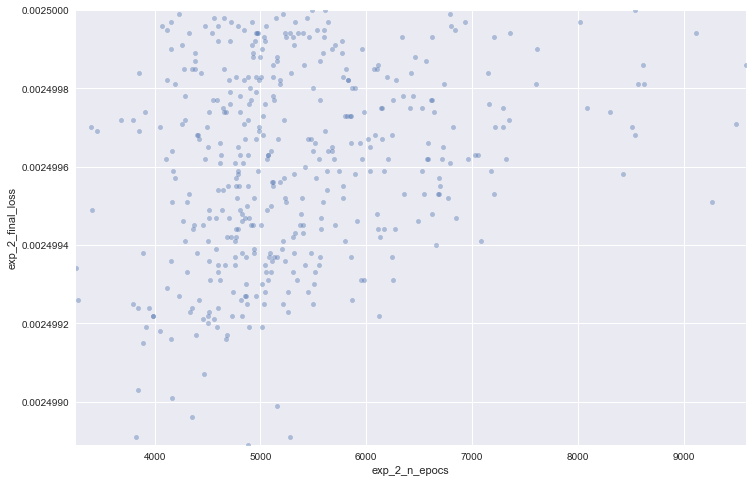

In [4]:
dat.plot.scatter(
    x='exp_2_n_epocs',
    y='exp_2_final_loss',
    ylim=(dat["exp_2_final_loss"].min(),dat["exp_2_final_loss"].max()),
    xlim=(dat["exp_2_n_epocs"].min(),dat["exp_2_n_epocs"].max()),
    figsize=(12,8),
    alpha=0.4
)

In [5]:
dat["exp_2_final_loss"].describe()

count    4.240000e+02
mean     2.499605e-03
std      2.446330e-07
min      2.498890e-03
25%      2.499420e-03
50%      2.499620e-03
75%      2.499810e-03
max      2.500000e-03
Name: exp_2_final_loss, dtype: float64

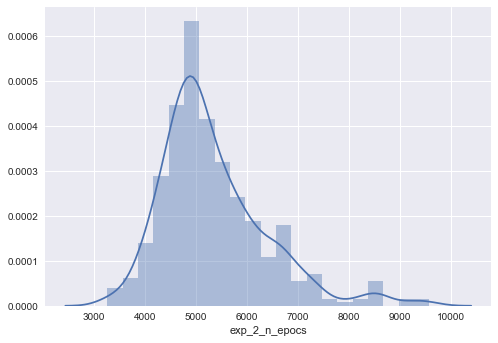

In [6]:
sns.distplot(dat["exp_2_n_epocs"])

In [7]:
dat.iloc[:,1:12].describe()

,XY_1,YZ_1,XZ_1,A1B1_1,A1B2_1,B1C1_1,B1C2_1,A2B2_1,A2B1_1,B2C2_1,B2C1_1
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,0.994494,0.994501,0.994382,0.943404,0.056580,0.942959,0.057147,0.942494,0.057175,0.942151,0.056949
std,0.005638,0.005627,0.005601,0.012363,0.012678,0.012079,0.012199,0.011730,0.012950,0.011908,0.012599
min,0.954656,0.964225,0.960281,0.900934,0.023530,0.902322,0.017831,0.907534,0.021987,0.907447,0.019297
25%,0.992064,0.992348,0.992263,0.935533,0.048623,0.935675,0.050496,0.935303,0.049467,0.934753,0.049340
50%,0.996177,0.996249,0.996026,0.941738,0.056630,0.941643,0.057464,0.941950,0.057171,0.940898,0.057043
75%,0.998481,0.998473,0.998429,0.949299,0.064882,0.948754,0.064705,0.948937,0.064561,0.948440,0.064635
max,0.999951,0.999890,0.999926,0.981005,0.097960,0.980623,0.090925,0.979046,0.097639,0.981170,0.103744


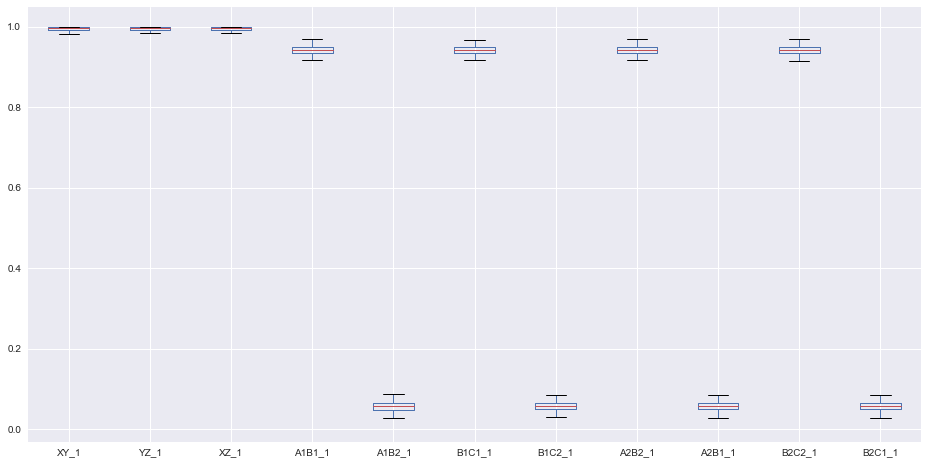

In [8]:
dat.iloc[:,1:12].plot(kind="box", figsize=(16,8))#, alpha=0.6)

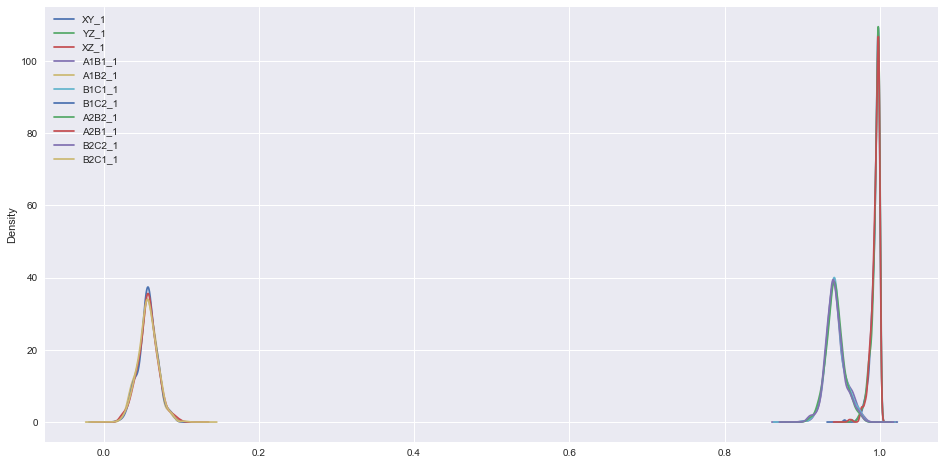

In [9]:
dat.iloc[:,1:12].plot(kind="density", figsize=(16,8))#, alpha=0.6)

In [10]:
dat.iloc[:,12:16].describe()

,A1C1_1,A1C2_1,A2C2_1,A2C1_1
count,424.000000,424.000000,424.000000,424.000000
mean,0.728346,0.371286,0.722226,0.373356
std,0.295656,0.304302,0.306294,0.305467
min,0.015175,0.017632,0.009058,0.024106
25%,0.549379,0.120541,0.534737,0.121795
50%,0.887406,0.234226,0.893579,0.247020
75%,0.947073,0.636560,0.944705,0.631243
max,0.992963,0.978412,0.989598,0.979414


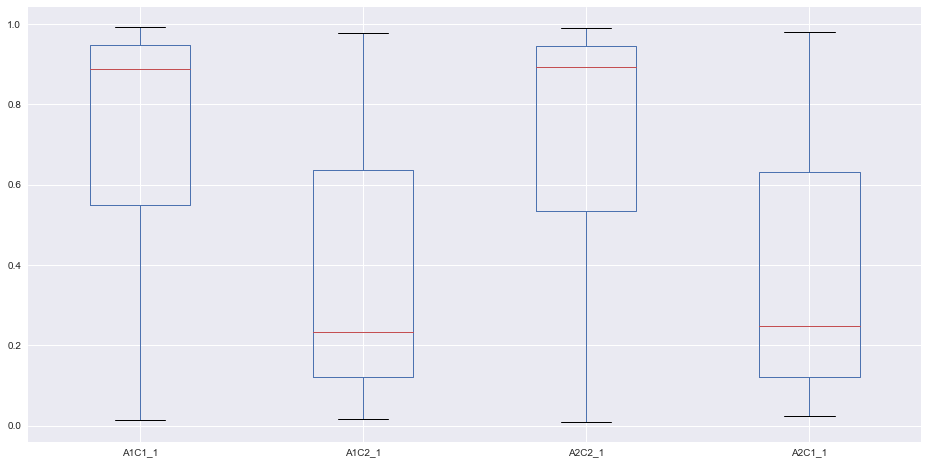

In [11]:
dat.iloc[:,12:16].plot(kind="box", figsize=(16,8))#, alpha=0.6)

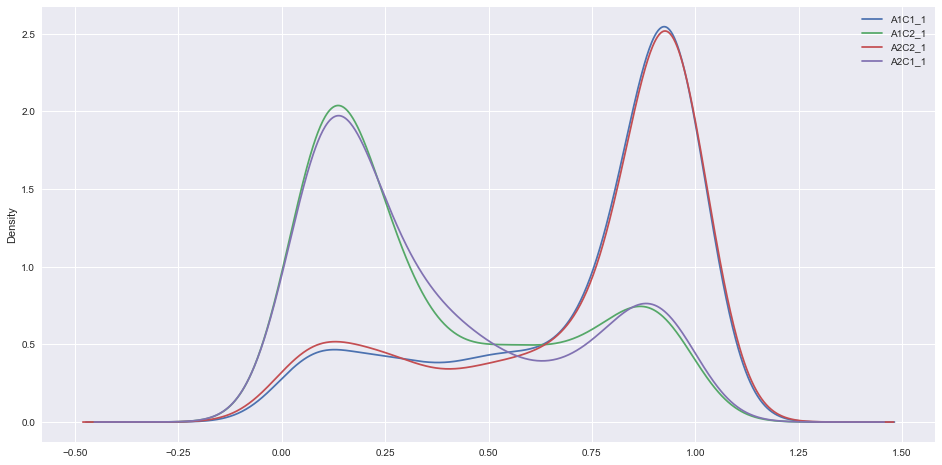

In [12]:
dat.iloc[:,12:16].plot.density(figsize=(16,8))

In [13]:
dat.iloc[:,18:26].describe()

,A1B1_2,A1B2_2,B1C1_2,B1C2_2,A2B2_2,A2B1_2,B2C2_2,B2C1_2
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,0.951628,0.049036,0.951535,0.048802,0.950779,0.048007,0.951259,0.048909
std,0.011609,0.011381,0.010795,0.011359,0.010821,0.011557,0.011052,0.011857
min,0.914467,0.018185,0.916906,0.013088,0.911107,0.011808,0.918417,0.017231
25%,0.944203,0.043156,0.944693,0.042635,0.944652,0.042100,0.944674,0.042474
50%,0.950617,0.049634,0.950173,0.049129,0.950241,0.049672,0.950442,0.049772
75%,0.957447,0.055230,0.957372,0.055108,0.956182,0.055405,0.956082,0.055822
max,0.982619,0.088846,0.982124,0.087868,0.981354,0.083855,0.981389,0.085562


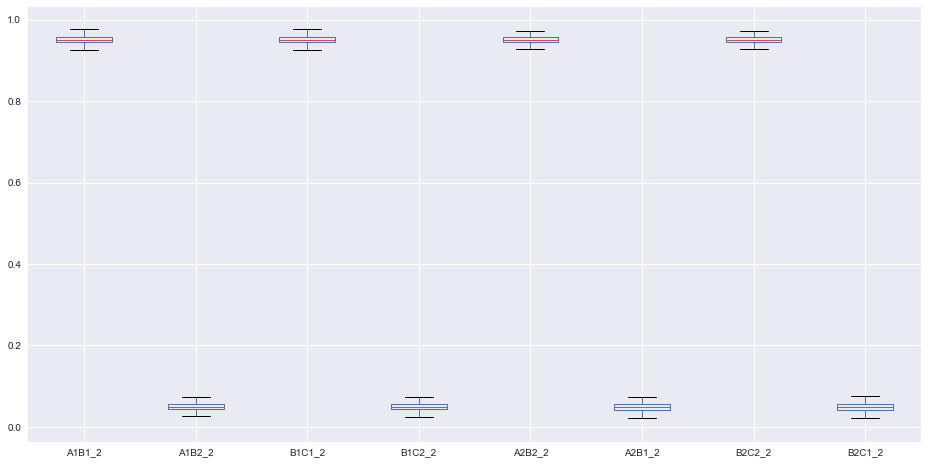

In [14]:
dat.iloc[:,18:26].plot(kind="box", figsize=(16,8))#, alpha=0.6)

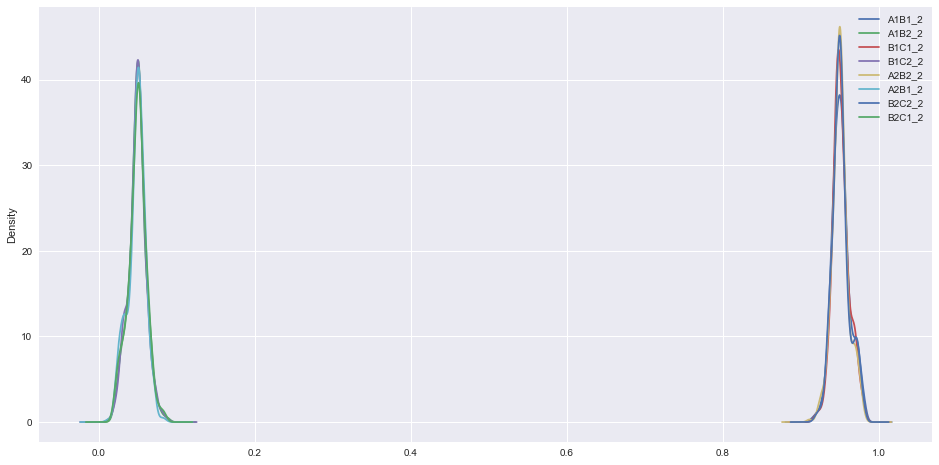

In [15]:
dat.iloc[:,18:26].plot(kind="density", figsize=(16,8))#, alpha=0.6)

In [16]:
dat.iloc[:,26:30].describe()

,A1C1_2,A1C2_2,A2C2_2,A2C1_2
count,424.000000,424.000000,424.000000,424.000000
mean,0.499810,0.498142,0.507054,0.470403
std,0.364693,0.354802,0.374212,0.355003
min,0.006500,0.018049,0.013481,0.012295
25%,0.099291,0.119685,0.091507,0.106013
50%,0.490314,0.516154,0.539855,0.360688
75%,0.906062,0.871939,0.911079,0.863005
max,0.990869,0.984806,0.987755,0.983411


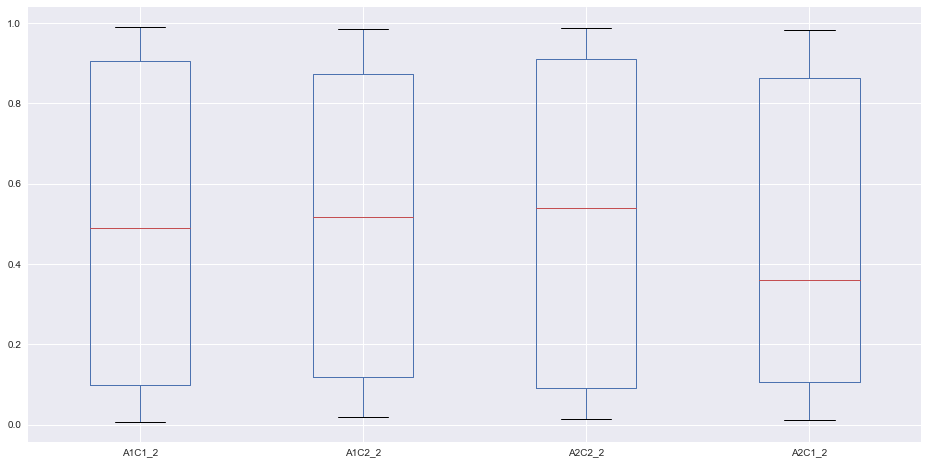

In [17]:
dat.iloc[:,26:30].plot(kind="box", figsize=(16,8))#, alpha=0.6)

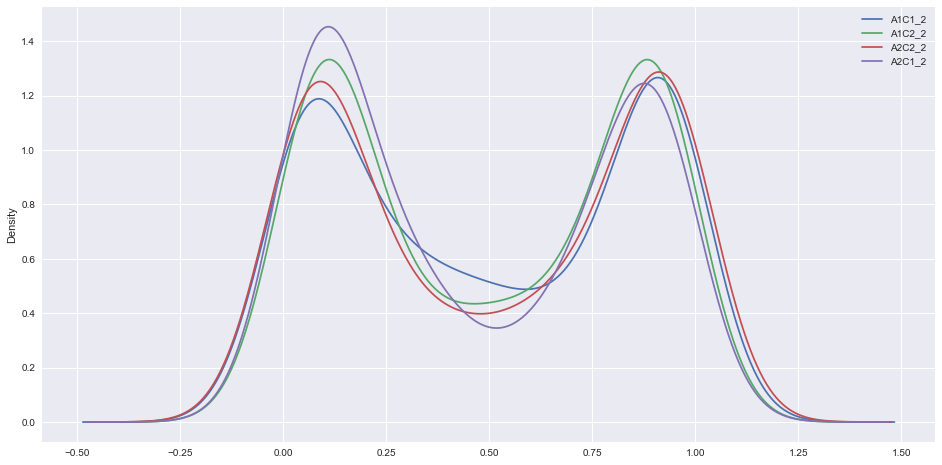

In [18]:
dat.iloc[:,26:30].plot(kind="density", figsize=(16,8))#, alpha=0.6)